In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skimage.morphology
import skimage.measure
import skimage.segmentation
import skimage.feature
import sklearn.preprocessing
import imageio
import glob
import cv2
from scipy.spatial import distance as dist
import pyefd
import math
import sklearn.decomposition
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import argparse
from math import atan2, cos, sin, sqrt, pi
from sklearn.svm import *
import sklearn.feature_selection
import sklearn.metrics
import scipy.io as spio

# def image_preprocessing(filepath, mask, background):
#     img = imageio.imread(filepath)
#     # img = img*mask
#     img = background - img

#     otsu_thresh = skimage.filters.threshold_otsu(img)
#     img_post = np.where(img<otsu_thresh, img, 0)

#     img_post = np.where(img_post>600, img, 0)

#     img_mask = np.where(img_post != 0, 1, 0)
#     img_seg = skimage.measure.label(img_mask, background = 0, connectivity=2)
#     assert( img_seg.max() != 0 )
#     mask = img_seg == np.argmax(np.bincount(img_seg.flat)[1:])+1

#     depth_img = np.where(mask != 0, img, 0)

#     return depth_img, mask



def image_preprocessing(filepath):
    img = imageio.imread(filepath)
    background = imageio.imread("masks\\background.tif")
    img = background - img

    otsu_thresh = skimage.filters.threshold_otsu(img)
    img_post = np.where(img<otsu_thresh, img, 0)

    img_post = np.where(img_post>600, img, 0)

    img_mask = np.where(img_post != 0, 1, 0)
    img_seg = skimage.measure.label(img_mask, background = 0, connectivity=2)
    assert( img_seg.max() != 0 )
    mask = img_seg == np.argmax(np.bincount(img_seg.flat)[1:])+1

    depth_img = np.where(mask != 0, img, 0)

    return depth_img, mask

BCS_aligned_sorted\3\Cow_26\85_D.tif


Text(0.5, 1.0, 'Mask')

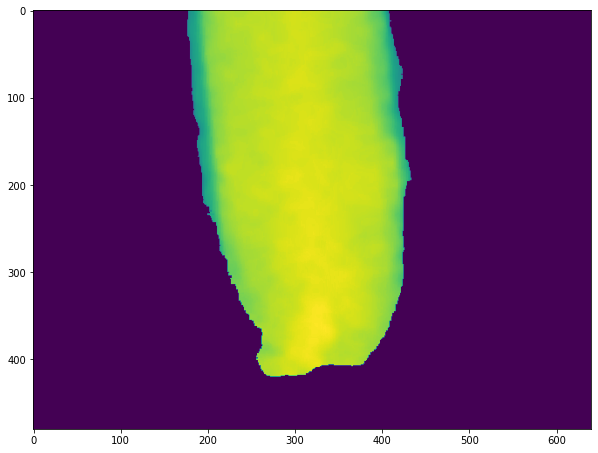

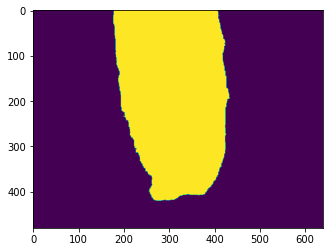

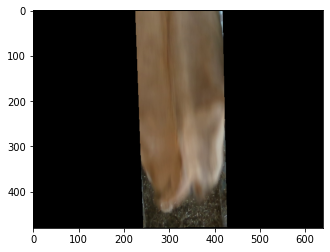

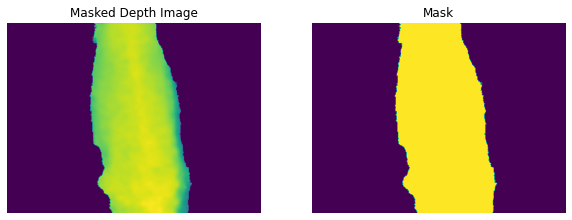

In [84]:
plt.figure(figsize=(10,10))
depth_img, mask = image_preprocessing("background_images\\100_D.tif")
plt.imshow(depth_img)

plt.figure()
plt.imshow(mask)

# plt.figure()
# plt.hist(img.flatten())


plt.figure()
temp_mask = imageio.imread("masks\\small_mask.tiff")
img_rgb = imageio.imread("background_images\\100_C.tif")
img_rgb[:, :, 0] = img_rgb[:, :, 0]*temp_mask
img_rgb[:, :, 1] = img_rgb[:, :, 1]*temp_mask
img_rgb[:, :, 2] = img_rgb[:, :, 2]*temp_mask
plt.imshow(img_rgb)


img_num = 400
filenames_temp = glob.glob('BCS_aligned_sorted\\3\\*\\*')

filenames = []
filenames_rgb = []
for image in filenames_temp:
    if image.endswith('_D.tif'):
        filenames.append(image)
    if image.endswith('_C.tif'):
        filenames_rgb.append(image)

img = imageio.imread(filenames[img_num])
print(filenames[img_num])
img_rgb = imageio.imread(filenames_rgb[img_num])

masked_depth, mask = image_preprocessing(filenames[img_num])


plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(masked_depth)
plt.axis('off')
plt.title('Masked Depth Image')

plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.axis('off')
plt.title('Mask')
